In [11]:
# %pip install - -user snowflake-connector-python
# %pip install python-dotenv

In [13]:
from dotenv import load_dotenv 
import os
import pymongo
import snowflake.connector
import pandas as pd
load_dotenv()

True

In [14]:
conn = snowflake.connector.connect(
    user=os.environ["SNOWFLAKE_USER"],
    password=os.environ["SNOWFLAKE_PASSWORD"],
    account=os.environ["SNOWFLAKE_ACCOUNT"],
    warehouse=os.environ["SNOWFLAKE_WAREHOUSE"],
    database=os.environ["SNOWFLAKE_DATABASE"],
    schema=os.environ["SNOWFLAKE_SCHEMA"],
    role=os.environ["SNOWFLAKE_ROLE"]
)

# Create a cursor object

cur = conn.cursor()

# Execute a query to select data from the table

cur.execute(f'SELECT * FROM FINALPROJECTDW.TIMESHEET_STAGING_STAGING.STG_TIMESHEET_FINAL')

# Fetch the results
rows = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

# Convert the result into a pandas DataFrame for easier manipulation
df = pd.DataFrame(rows, columns=[x[0] for x in cur.description])


In [15]:
df = pd.DataFrame(rows, columns=[x[0] for x in cur.description])
df

,EMPID,PROJECTSELECTED,STARTDATE,ENDDATE,TASKSELECTED,COMMENTADDED,D0,D1,D2,D3,D4,D5,D6,ACTIVITYNAME
0,jman6188,Richards-Clark Initiative,25-12-2022,31-12-2022,Task C,,0,6,5,10,4,11,0,Sales Activity
1,jman6188,Richards-Clark Initiative,01-01-2023,07-01-2023,Task B,,2,9,5,0,11,4,6,BAU Activity
2,jman6188,Richards-Clark Initiative,08-01-2023,14-01-2023,Task D,Ready to dive in,8,6,7,0,3,0,0,BAU Activity
3,jman6188,Richards-Clark Initiative,15-01-2023,21-01-2023,Task D,,0,5,5,12,4,5,8,BAU Activity
4,jman6188,Richards-Clark Initiative,22-01-2023,28-01-2023,Task D,,10,0,12,4,6,5,3,BAU Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195929,jman6680,"Wolfe, Wilson and Shields Project",19-11-2023,25-11-2023,Task D,,10,6,10,5,0,0,0,BAU Activity
195930,jman6680,"Wolfe, Wilson and Shields Project",26-11-2023,02-12-2023,Task C,Hopeful for a successful outcome,2,0,0,8,0,6,0,BAU Activity
195931,jman6680,"Wolfe, Wilson and Shields Project",03-12-2023,09-12-2023,Task A,,0,0,0,4,5,4,1,BAU Activity
195932,jman6680,"Wolfe, Wilson and Shields Project",10-12-2023,16-12-2023,Task D,Excited to get started!,0,1,0,0,6,0,0,Sales Activity


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195934 entries, 0 to 195933
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   EMPID            195934 non-null  object
 1   PROJECTSELECTED  195934 non-null  object
 2   STARTDATE        195934 non-null  object
 3   ENDDATE          195934 non-null  object
 4   TASKSELECTED     195934 non-null  object
 5   COMMENTADDED     195934 non-null  object
 6   D0               195934 non-null  int64 
 7   D1               195934 non-null  int64 
 8   D2               195934 non-null  int64 
 9   D3               195934 non-null  int64 
 10  D4               195934 non-null  int64 
 11  D5               195934 non-null  int64 
 12  D6               195934 non-null  int64 
 13  ACTIVITYNAME     195934 non-null  object
dtypes: int64(7), object(7)
memory usage: 20.9+ MB


In [45]:
# %pip install matplotlib
# %pip install seaborn




## Visual Analysis

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

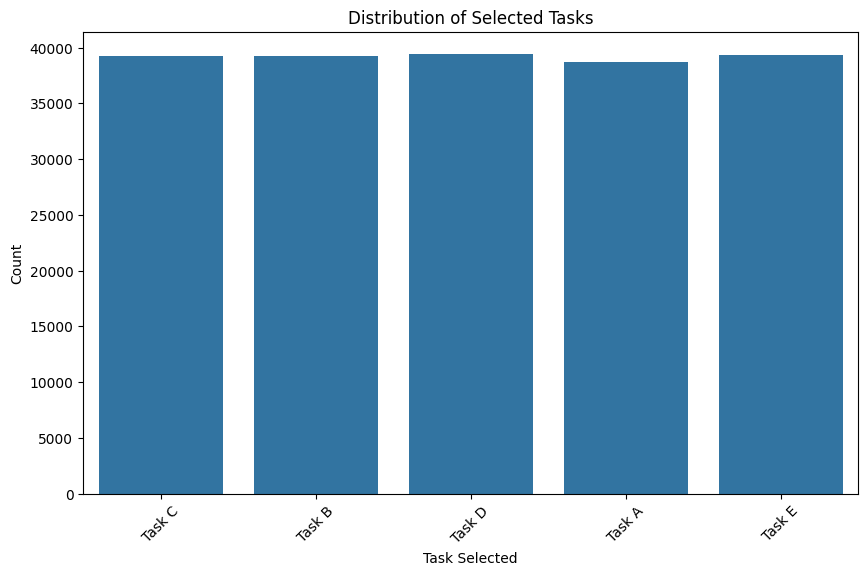

In [24]:
# Distribution of taskselected

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TASKSELECTED')
plt.title('Distribution of Selected Tasks')
plt.xlabel('Task Selected')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

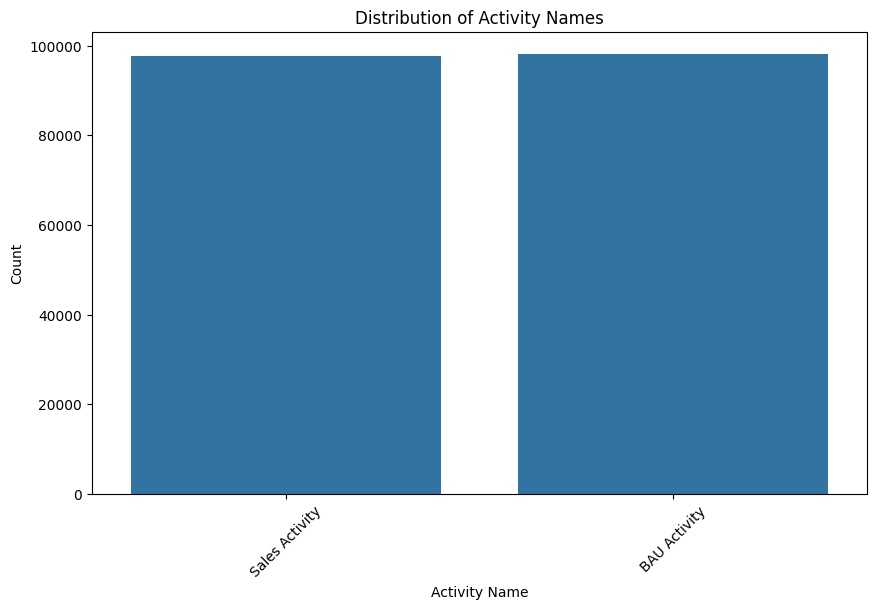

In [25]:
# Distribution of activityname


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ACTIVITYNAME')
plt.title('Distribution of Activity Names')
plt.xlabel('Activity Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Analysis of commentadded

comment_counts = df['COMMENTADDED'].value_counts()
print("Top 5 Comment Added:")
print(comment_counts.head())


Top 5 Comment Added:
COMMENTADDED
                                      97802
Ready to dive in                      12362
Eager to collaborate with the team    12360
Hopeful for a successful outcome      12324
Feeling motivated                     12289
Name: count, dtype: int64


In [27]:
# Analysis of total working hours per day

daily_hours = df[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']]
daily_hours_sum = daily_hours.sum(axis=1)
average_daily_hours = daily_hours_sum.mean()
print("Average total working hours per day:", average_daily_hours)


Average total working hours per day: 23.727331652495227


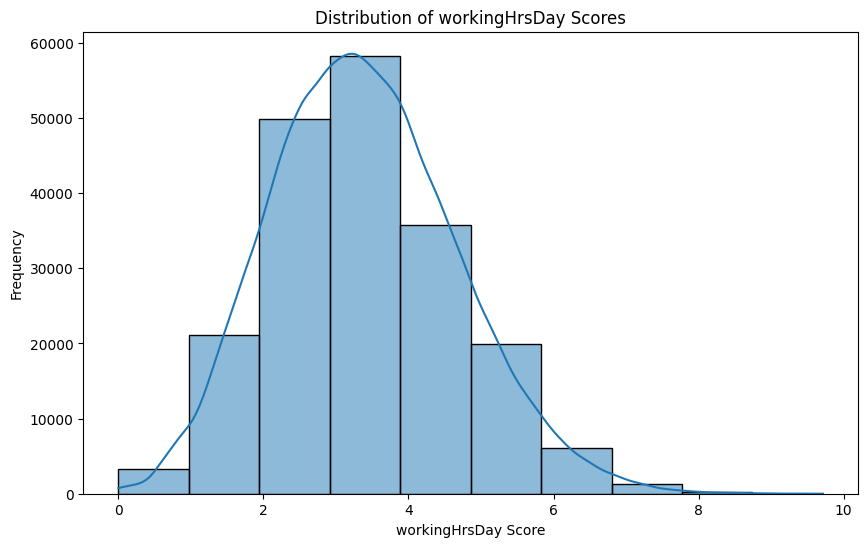

In [28]:
workingHrsDay_columns = ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']
df['workingHrsDay_SCORE'] = df[workingHrsDay_columns].mean(axis=1)

# Plot a histogram of qworking hours 
plt.figure(figsize=(10, 6))
sns.histplot(df['workingHrsDay_SCORE'], bins=10, kde=True)
plt.title('Distribution of workingHrsDay Scores')
plt.xlabel('workingHrsDay Score')
plt.ylabel('Frequency')
plt.show()

## Feature engineering and Model training


In [29]:
df['TOTAL_WEEKLY_HOURS'] = df[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']].sum(axis=1)

# Calculate average daily hours for each employee
df['AVG_DAILY_HOURS'] = df[['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']].mean(axis=1)

# Mark attention needed based on thresholds
df['ATTENTION_WEEKLY'] = (df['TOTAL_WEEKLY_HOURS'] < 40).astype(int)
df['ATTENTION_DAILY'] = (df['AVG_DAILY_HOURS'] < 8).astype(int)

# Save the updated DataFrame to a new CSV file
df.to_csv('updated_timesheet.csv', index=False)

# Display the first few rows of the updated DataFrame
df

,EMPID,PROJECTSELECTED,STARTDATE,ENDDATE,TASKSELECTED,COMMENTADDED,D0,D1,D2,D3,D4,D5,D6,ACTIVITYNAME,workingHrsDay_SCORE,TOTAL_WEEKLY_HOURS,AVG_DAILY_HOURS,ATTENTION_WEEKLY,ATTENTION_DAILY
0,jman6188,Richards-Clark Initiative,25-12-2022,31-12-2022,Task C,,0,6,5,10,4,11,0,Sales Activity,5.142857,36,5.142857,1,1
1,jman6188,Richards-Clark Initiative,01-01-2023,07-01-2023,Task B,,2,9,5,0,11,4,6,BAU Activity,5.285714,37,5.285714,1,1
2,jman6188,Richards-Clark Initiative,08-01-2023,14-01-2023,Task D,Ready to dive in,8,6,7,0,3,0,0,BAU Activity,3.428571,24,3.428571,1,1
3,jman6188,Richards-Clark Initiative,15-01-2023,21-01-2023,Task D,,0,5,5,12,4,5,8,BAU Activity,5.571429,39,5.571429,1,1
4,jman6188,Richards-Clark Initiative,22-01-2023,28-01-2023,Task D,,10,0,12,4,6,5,3,BAU Activity,5.714286,40,5.714286,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195929,jman6680,"Wolfe, Wilson and Shields Project",19-11-2023,25-11-2023,Task D,,10,6,10,5,0,0,0,BAU Activity,4.428571,31,4.428571,1,1
195930,jman6680,"Wolfe, Wilson and Shields Project",26-11-2023,02-12-2023,Task C,Hopeful for a successful outcome,2,0,0,8,0,6,0,BAU Activity,2.285714,16,2.285714,1,1
195931,jman6680,"Wolfe, Wilson and Shields Project",03-12-2023,09-12-2023,Task A,,0,0,0,4,5,4,1,BAU Activity,2.000000,14,2.000000,1,1
195932,jman6680,"Wolfe, Wilson and Shields Project",10-12-2023,16-12-2023,Task D,Excited to get started!,0,1,0,0,6,0,0,Sales Activity,1.000000,7,1.000000,1,1


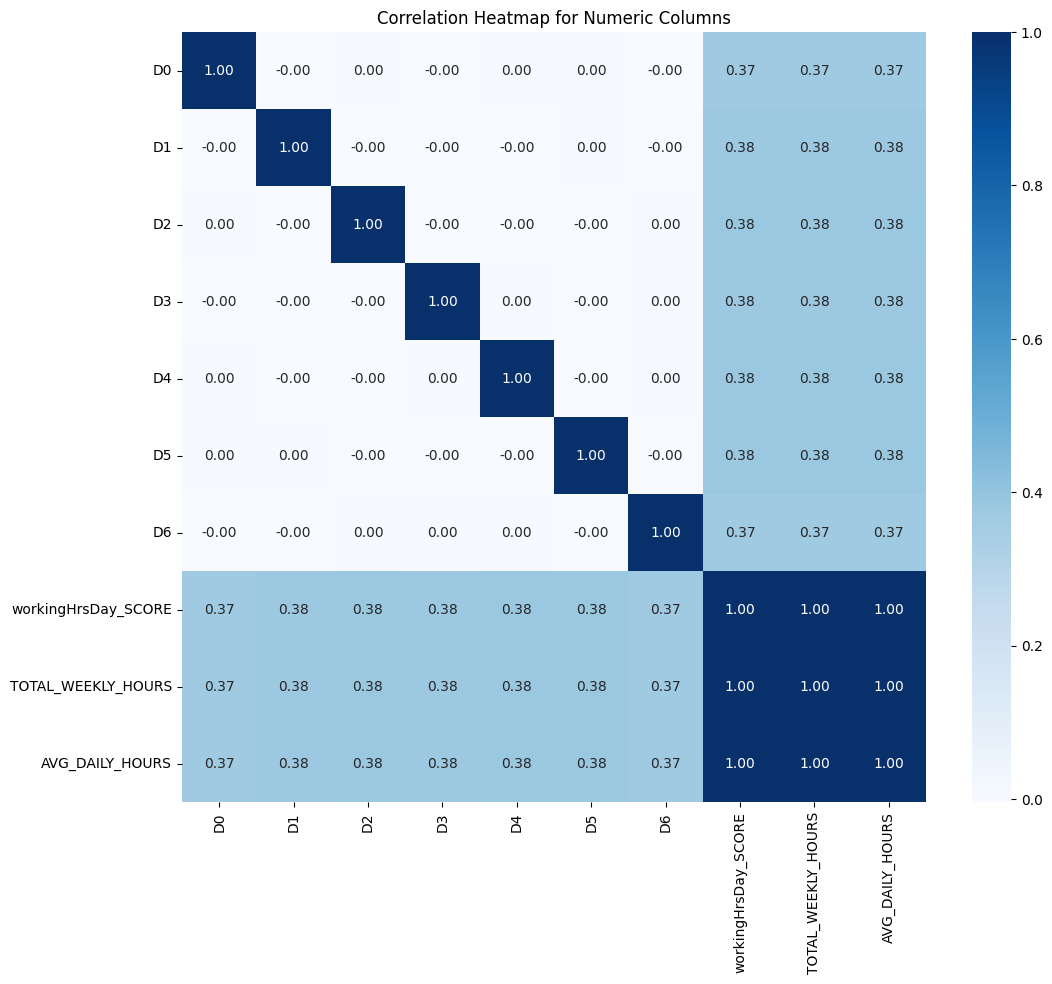

In [56]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()


In [30]:
attendance_status = df.groupby('EMPID').apply(
    lambda x: 1 if (x['ATTENTION_WEEKLY'].sum() == 1) and (x['ATTENTION_DAILY'].sum() == 1) else 0
)

# Display the attendance status for each employee
print("Attendance Status:")
print(attendance_status)



employees_with_improper_attendance = attendance_status[attendance_status == 1]

# Print the employees with proper attendance
print("Employees with proper attendance (Attendance Status = 1):")
print(employees_with_improper_attendance)

Attendance Status:
EMPID
jman1002    0
jman1004    0
jman1006    0
jman1007    0
jman1012    0
           ..
jman9989    0
jman9991    0
jman9993    0
jman9996    0
jman9997    0
Length: 3399, dtype: int64
Employees with proper attendance (Attendance Status = 1):
Series([], dtype: int64)


C:\Users\MohanaPriyaT\AppData\Local\Temp\ipykernel_9860\3692056109.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  attendance_status = df.groupby('EMPID').apply(


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from  sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


from imblearn.over_sampling import SMOTE


In [63]:


undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(df[['TOTAL_WEEKLY_HOURS', 'AVG_DAILY_HOURS']], df['ATTENTION_WEEKLY'])
# Perform Min-Max scaling on the features
scaler = MinMaxScaler()
X_rescaled = scaler.fit_transform(X_resampled)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y_resampled, test_size=0.2, random_state=42)






## Logistic Regression with undersampling

In [58]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9823859087269816


## Support vector classifier with undersampling

In [66]:




# Perform under-sampling to balance the classes
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(df[['TOTAL_WEEKLY_HOURS', 'AVG_DAILY_HOURS']], df['ATTENTION_WEEKLY'])

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X_resampled)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVC( random_state=42) 
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1906
           1       1.00      1.00      1.00      1841

    accuracy                           1.00      3747
   macro avg       1.00      1.00      1.00      3747
weighted avg       1.00      1.00      1.00      3747



## Logistic regression 

In [62]:


# Assuming df is your DataFrame containing the attendance data

# Perform over-sampling with SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df[['TOTAL_WEEKLY_HOURS', 'AVG_DAILY_HOURS']], df['ATTENTION_WEEKLY'])

# Perform Min-Max scaling on the features
scaler = MinMaxScaler()
X_rescaled = scaler.fit_transform(X_resampled)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9944390845259152
